# Scan the Code Project
Description

In [15]:
import numpy as np
import cv2
import argparse
from matplotlib import pyplot as plt
%matplotlib inline

Define the RGB thresholds for what RED, BLUE, and GREEN specifically are. Describe upper and lower bound using python dictionary.

In [2]:
# define the lower and upper boundaries of the colors in the HSV color space
lower = {'red':(166, 84, 141), 'green':(66, 122, 129), 'blue':(97, 100, 117), 'yellow':(23, 59, 119), 'orange':(0, 50, 80)} #assign new item lower['blue'] = (93, 10, 0)
upper = {'red':(186,255,255), 'green':(86,255,255), 'blue':(117,255,255), 'yellow':(54,255,255), 'orange':(20,255,255)}

In [3]:
lower

{'blue': (97, 100, 117),
 'green': (66, 122, 129),
 'orange': (0, 50, 80),
 'red': (166, 84, 141),
 'yellow': (23, 59, 119)}

In [4]:
upper

{'blue': (117, 255, 255),
 'green': (86, 255, 255),
 'orange': (20, 255, 255),
 'red': (186, 255, 255),
 'yellow': (54, 255, 255)}

In [5]:
# define standard colors for circle around the object
colors = {'red':(0,0,255), 'green':(0,255,0), 'blue':(255,0,0), 'yellow':(0, 255, 217), 'orange':(0,140,255)}
colors

{'blue': (255, 0, 0),
 'green': (0, 255, 0),
 'orange': (0, 140, 255),
 'red': (0, 0, 255),
 'yellow': (0, 255, 217)}

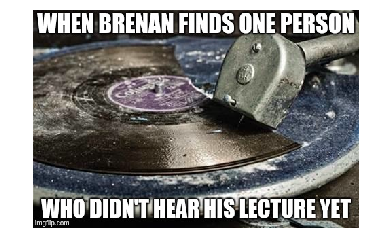

In [6]:
img = cv2.imread('image.png')
# cv2.imshow('image', img)
plt.axis('off')
plt.imshow(img)

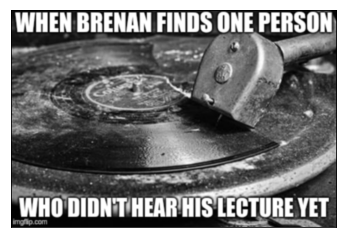

In [12]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

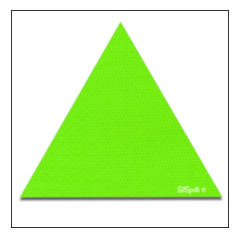

In [14]:
green_triangle = cv2.imread('green_triangle.png')
plt.imshow(green_triangle, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()